# Chapter 2 - Statistical visualizations with Matplotlib and Seaborn

In [1]:
#%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets


## Activity 1 - Plotting a function

In [32]:
x = np.linspace(-50,50,100)

In [33]:
y = np.power(x,2)

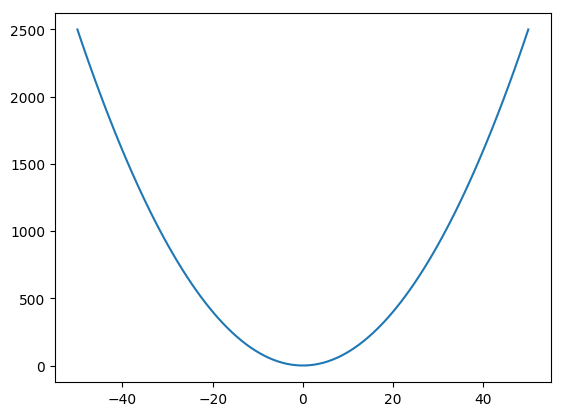

In [34]:
plt.plot(x, y)

In [35]:
y_hat = np.power(x,3)

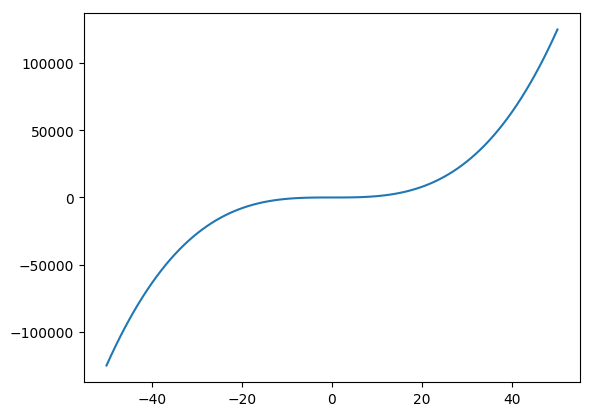

In [36]:
plt.plot(x, y_hat)

## Activity 2

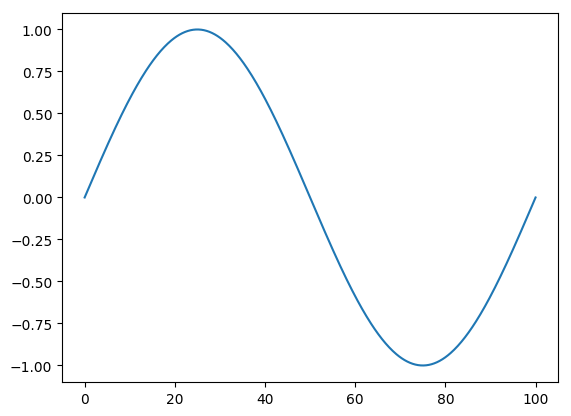

In [37]:
fig, ax = plt.subplots()
x = np.linspace(0,100,500)
y = np.sin(2*np.pi*x/100)
ax.plot(x, y)

# Auto MPG dataset


    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

In [38]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
df = pd.read_csv(url, names= column_names, delim_whitespace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [39]:
df.loc[df.horsepower == '?', 'horsepower'] = np.nan
df['horsepower'] = pd.to_numeric(df['horsepower'])
df['full_date'] = pd.to_datetime(df.year, format='%y')
df['year'] = df['full_date'].dt.year
df.dtypes

mpg                    float64
cylinders                int64
displacement           float64
horsepower             float64
weight                 float64
acceleration           float64
year                     int64
origin                   int64
name                    object
full_date       datetime64[ns]
dtype: object

## Activity 3

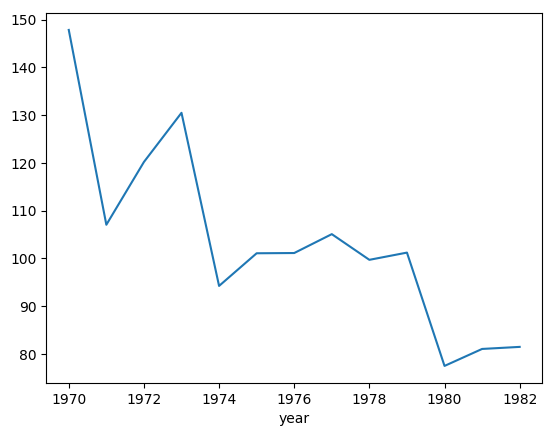

In [40]:
df.groupby('year')['horsepower'].mean().plot()

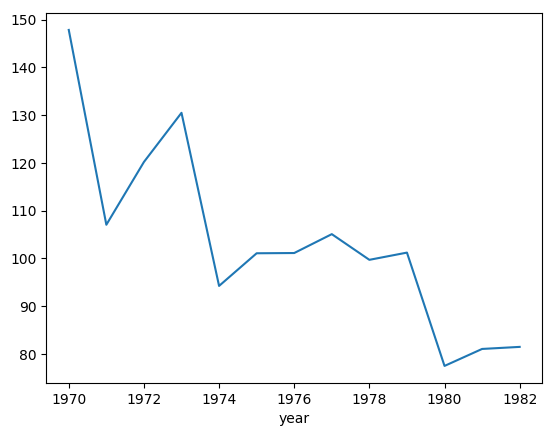

In [41]:
fig, ax = plt.subplots()
df.groupby('year')['horsepower'].mean().plot(ax=ax)

## Activity 4 - scatter plots

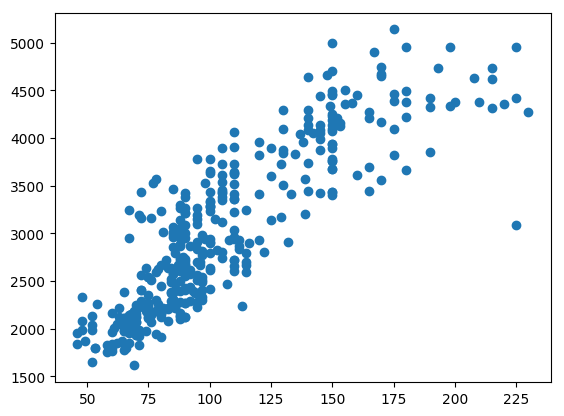

In [42]:
fig, ax = plt.subplots()
ax.scatter(x = df['horsepower'], y=df['weight'])

## Activity 5

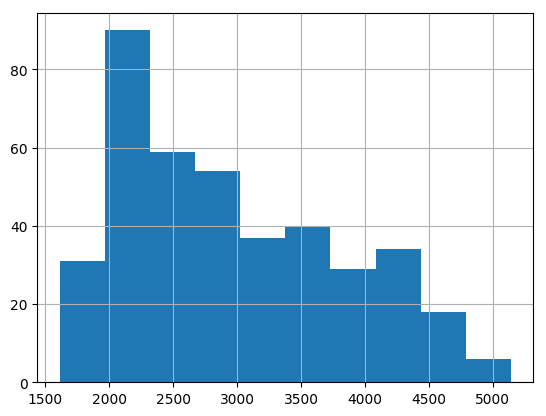

In [43]:
df.weight.hist()

/home/ispmarin/lib/venvs/packt/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


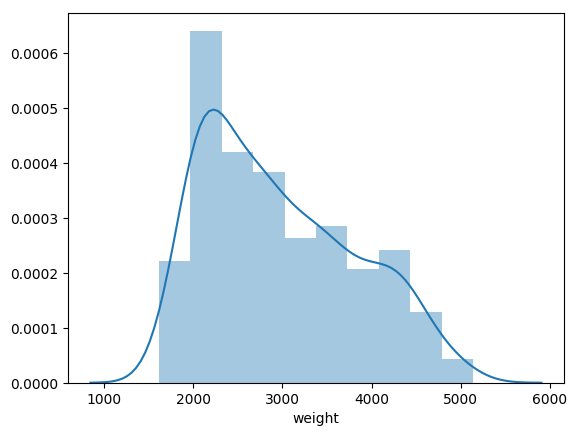

In [44]:
sns.distplot(df['weight'])

## Activity 6: box plots

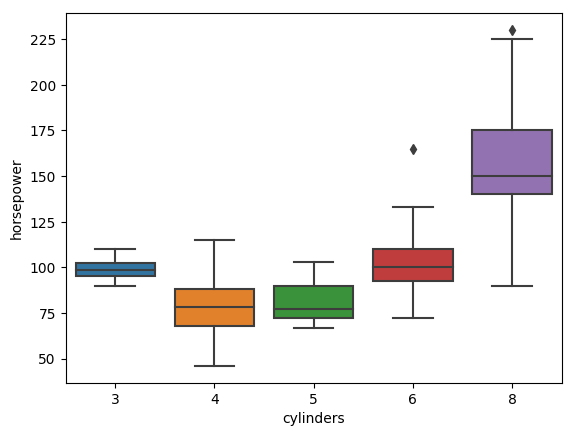

In [45]:
sns.boxplot(data=df, x="cylinders", y="horsepower")

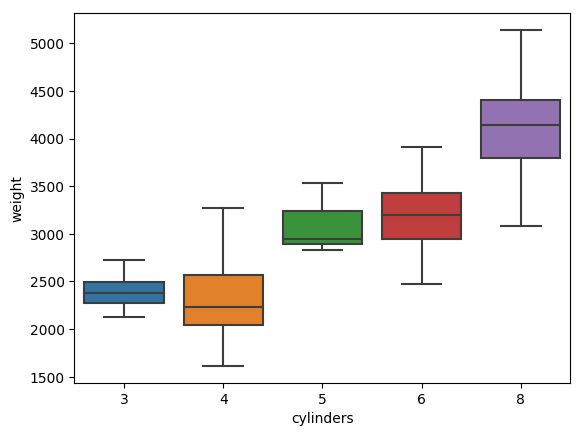

In [46]:
sns.boxplot(data=df, x="cylinders", y="weight")

## Activity 7 - Graph formatting


In [47]:
df_g = df.groupby(['year', 'cylinders'], as_index=False).horsepower.mean()
df_g = df_g.set_index(df_g.year)

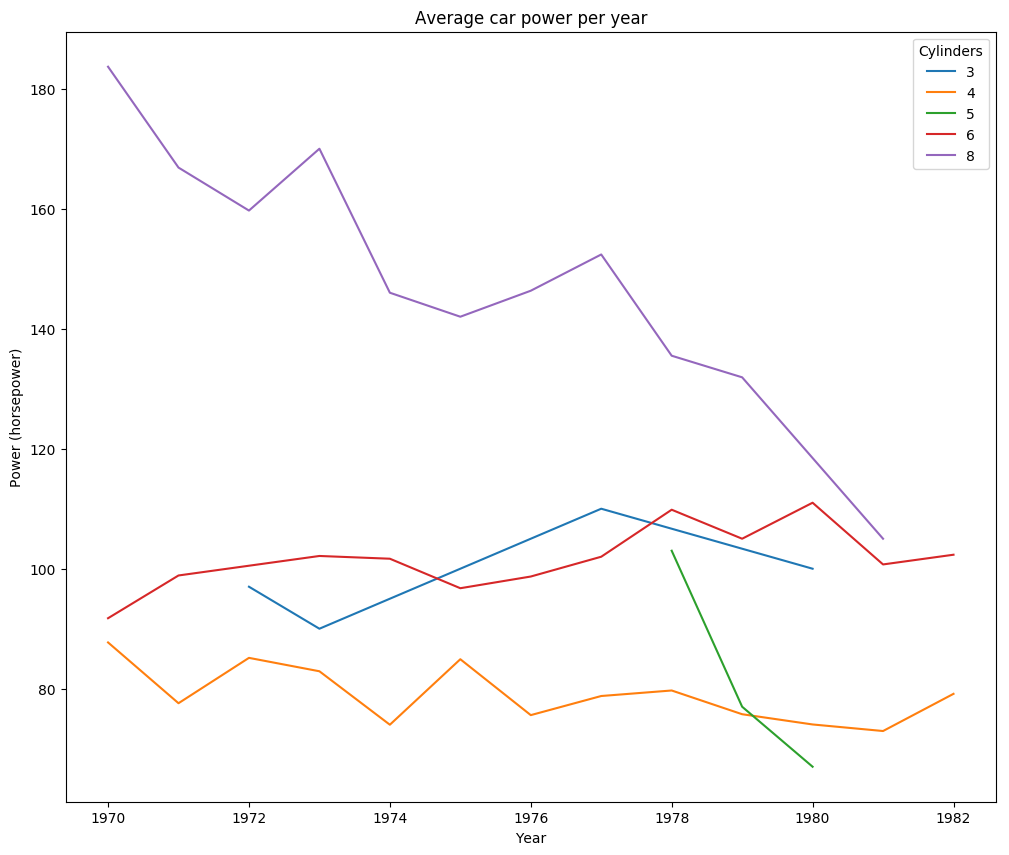

In [52]:
fig, axes = plt.subplots()
df_g.groupby('cylinders').horsepower.plot(axes=axes, figsize=(12,10))
_ = axes.set(
    title="Average car power per year",
    xlabel="Year",
    ylabel="Power (horsepower)"
    
)
axes.legend(title='Cylinders', fancybox=True)

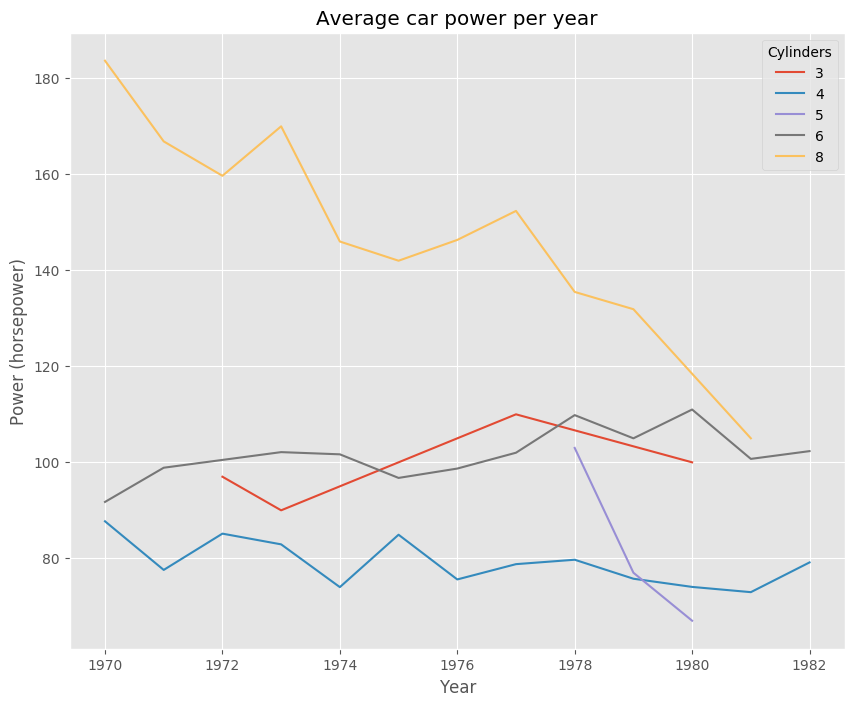

In [53]:
with plt.style.context('ggplot'):
    fig, axes = plt.subplots()
    df_g.groupby('cylinders').horsepower.plot(axes=axes, figsize=(10,8))
    _ = axes.set(
        title="Average car power per year",
        xlabel="Year",
        ylabel="Power (horsepower)"

    )
    axes.legend(title='Cylinders', fancybox=True)
plt.style.use('default')

## Activity 8 - Line plot with Seaborn

[Text(0.5, 1.0, 'Average car power per year')]

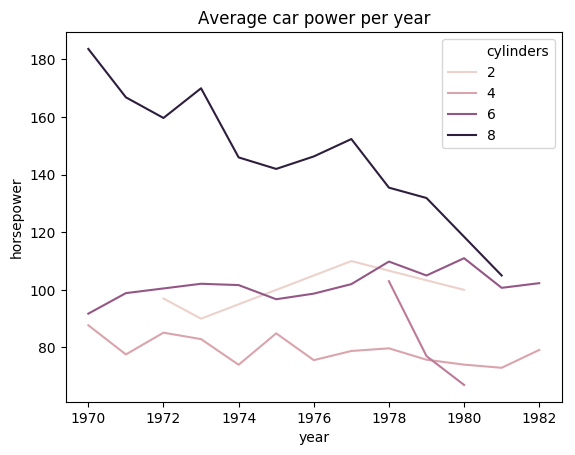

In [54]:
ax = sns.lineplot(data=df_g, x='year', y='horsepower', hue='cylinders')
ax.set(title='Average car power per year')

In [17]:
df['decade'] = df.full_date.dt.year // 10 * 10

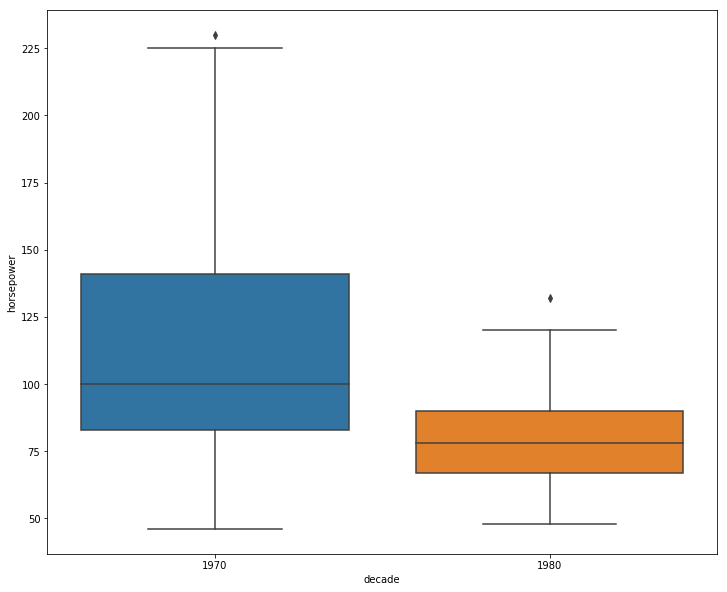

In [18]:
sns.boxplot(data=df, x='decade', y='horsepower')

## Histogram

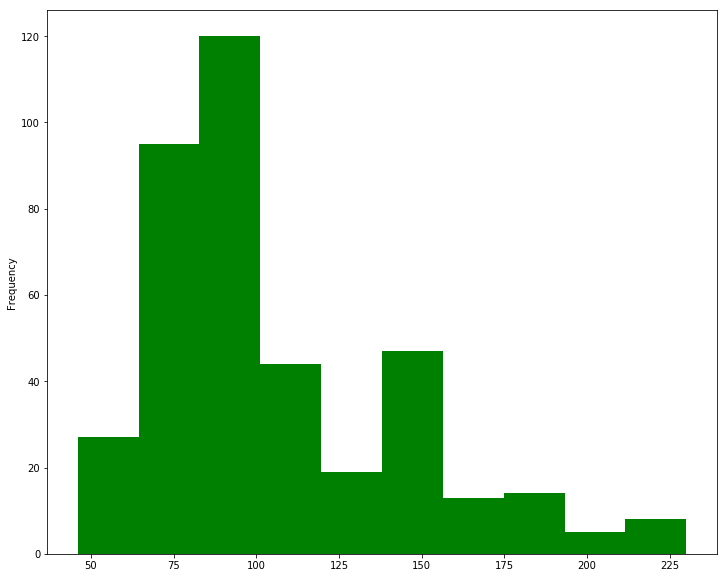

In [65]:
df.horsepower.plot(kind='hist', color='green')

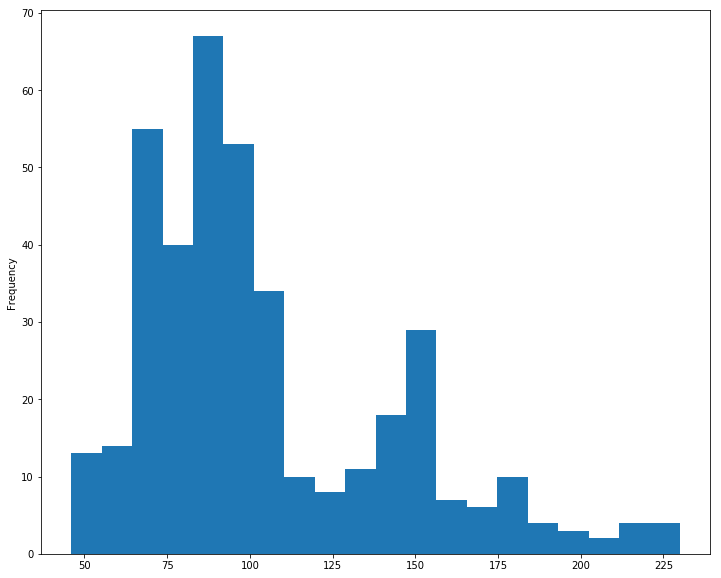

In [21]:
df.horsepower.plot(kind='hist', bins=20)

(array([15., 56., 51., 89., 46., 29., 15., 15., 36.,  8., 15.,  4.,  3.,
         5.,  5.]),
 array([ 46.        ,  58.26666667,  70.53333333,  82.8       ,
         95.06666667, 107.33333333, 119.6       , 131.86666667,
        144.13333333, 156.4       , 168.66666667, 180.93333333,
        193.2       , 205.46666667, 217.73333333, 230.        ]),
 <a list of 15 Patch objects>)

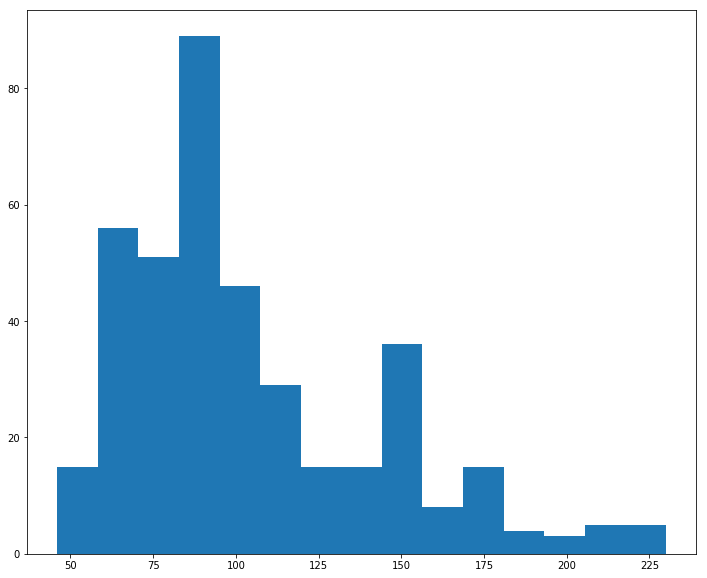

In [23]:
plt.hist(df.horsepower.sort_values(), bins=15)

In [67]:
print(plt.style.available)

['seaborn-bright', 'seaborn-ticks', 'seaborn-dark-palette', 'seaborn-colorblind', 'classic', 'fivethirtyeight', 'seaborn-poster', 'seaborn-notebook', 'dark_background', 'seaborn-pastel', 'seaborn-deep', 'seaborn-dark', 'Solarize_Light2', 'seaborn-darkgrid', 'tableau-colorblind10', '_classic_test', 'bmh', 'ggplot', 'seaborn-whitegrid', 'seaborn-talk', 'grayscale', 'seaborn', 'seaborn-muted', 'seaborn-paper', 'fast', 'seaborn-white']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2915fd2c18>]],
      dtype=object)

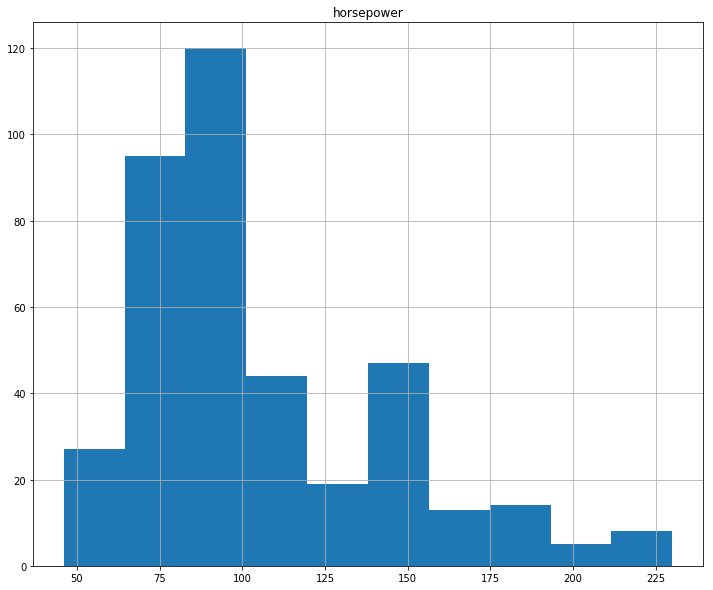

In [68]:
df.hist(column='horsepower')